<a href="https://www.kaggle.com/code/krishnaprasad2608/twitter-sentiment-analysis?scriptVersionId=163237039" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
In the fast-paced world of digital media, having a thorough comprehension of how a brand, product, or service is perceived is crucial. This is where sentiment analysis comes into play, a powerful method of analyzing contextual text that allows us to understand subjective information from online discussions. Although traditional techniques offer a basic understanding of sentiment and utilize simple numerical metrics, they often fall short of fully uncovering the valuable insights hidden within. This project focuses on sentiment analysis of Twitter data, utilizing machine learning algorithms to classify tweets as either positive or negative.

# Objective
The main aim of this project is to perform sentiment analysis on a specific Twitter dataset using the NLTK package. In order to achieve this, we will be utilizing a minimum of two machine learning models, specifically Naive Bayes, to categorize tweets as either positive or negative. As an added layer of analysis, we will also plot Receiver Operating Characteristic (ROC) curves for each individual model, as well as for the combined models. This will be accompanied by the computation and presentation of various metrics, such as accuracy, F1 score, precision, recall, and confusion matrix, to provide a thorough and insightful evaluation of the models' effectiveness.

# Variables Description
•**target:** Sentiment label (positive/negative) for tweet classification.

•**ids:** Unique identifier for each individual tweet.

•**date:** Timestamp indicating tweet creation date and time.

•**flag:** Additional metadata or attributes associated with each tweet.

•**user:** Twitter username or handle of the tweet author.

•**text:** Content of the tweet for sentiment analysis.


# EDA

In [1]:
#importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [2]:
#Reading the dataset
df = pd.read_excel('/kaggle/input/sentiment-analysis-2/40k.xlsx')

In [3]:
#taking a glance at the data
df.head(5)

,target,ids,date,flag,user,text
0,0,1974671194,Sat May 30 13:36:31 PDT 2009,NO_QUERY,simba98,@xnausikaax oh no! where did u order from? tha...
1,0,1997882236,Mon Jun 01 17:37:11 PDT 2009,NO_QUERY,Seve76,A great hard training weekend is over. a coup...
2,0,2177756662,Mon Jun 15 06:39:05 PDT 2009,NO_QUERY,x__claireyy__x,"Right, off to work Only 5 hours to go until I..."
3,0,2216838047,Wed Jun 17 20:02:12 PDT 2009,NO_QUERY,Balasi,I am craving for japanese food
4,0,1880666283,Fri May 22 02:03:31 PDT 2009,NO_QUERY,djrickdawson,Jean Michel Jarre concert tomorrow gotta work...


In [4]:
#value counts of the target variable
df['target'].value_counts()

target
0    20000
4    20000
Name: count, dtype: int64

In [5]:
# Replace 4 with 1 in the 'target' column
df['target'] = df['target'].replace(4, 1)

In [6]:
# Print unique values
unique_targets = df['target'].unique()
unique_targets

array([0, 1])

In [7]:
# Count occurrences of each unique target
target_counts = df['target'].value_counts()
target_counts

target
0    20000
1    20000
Name: count, dtype: int64

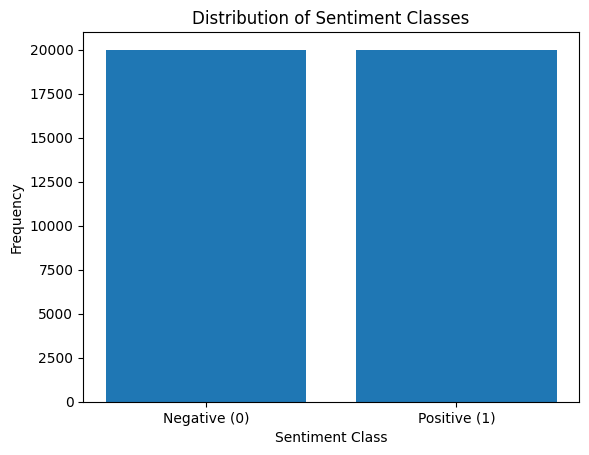

In [8]:
# Plotting
plt.bar(['Negative (0)', 'Positive (1)'], target_counts)

# Adding title and labels
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Frequency')

# Display the plot
plt.show()

The bar chart above showcases an equal representation of sentiment classes, Negative (0) and Positive (1), with 200,000 positive and 200,000 negative tweets.

# Data Preprocessing

In [9]:
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing function to 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Display preprocessed DataFrame
print(df.head())

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
   target         ids                          date      flag            user  \
0       0  1974671194  Sat May 30 13:36:31 PDT 2009  NO_QUERY         simba98   
1       0  1997882236  Mon Jun 01 17:37:11 PDT 2009  NO_QUERY          Seve76   
2       0  2177756662  Mon Jun 15 06:39:05 PDT 2009  NO_QUERY  x__claireyy__x   
3       0  2216838047  Wed Jun 17 20:02:12 PDT 2009  NO_QUERY          Balasi   
4       0  1880666283  Fri May 22 02:03:31 PDT 2009  NO_QUERY    djrickdawson   

                                                text  
0                 xnausikaax oh u order that horribl  
1  great hard train weekend coupl day rest let lo...  
2                    right work 5 hour go im free xd  
3                                 crave japanes food 

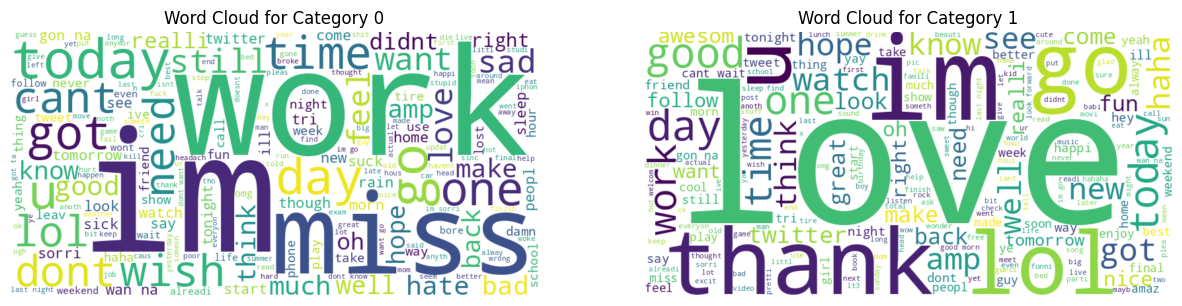

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate text data based on the target categories
text_category_0 = df[df['target'] == 0]['text']
text_category_1 = df[df['target'] == 1]['text']

# Generate word cloud for category 0
wordcloud_category_0 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_category_0))

# Generate word cloud for category 1
wordcloud_category_1 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_category_1))

# Plot word clouds
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_category_0, interpolation='bilinear')
plt.title('Word Cloud for Category 0')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_category_1, interpolation='bilinear')
plt.title('Word Cloud for Category 1')
plt.axis('off')

plt.show()

The word clouds shown above capture the top words present in each category. The left displays significant terms from negative tweets, while the right showcases prevailing words in positive tweets. These visualizations provide valuable insights into the themes and sentiments conveyed in each tweet category.

# Naive Bayes

In [11]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], 
                                                    test_size=0.2, random_state=42)

The data has been separated into two sets, train and test, with an 80-20 ratio. This approach ensures that the machine learning model is trained and evaluated effectively, resulting in consistent and reliable results.

In [12]:
# Vectorizing text using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [13]:
# Training a Naive Bayes classifier
NB_clf = MultinomialNB()
NB_clf.fit(X_train_counts, y_train)

MultinomialNB()

In [14]:
# Predicting on the test set
y_pred = NB_clf.predict(X_test_counts)

In [15]:
# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7305

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      4014
           1       0.76      0.67      0.71      3986

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000



In [16]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(NB_clf, X_train_counts, y_train, cv=5)  

# Print the cross-validation scores
print("Cross-validation scores:")
for i, score in enumerate(cv_scores, start=1):
    print(f" {i}: {score:.2f}")

Cross-validation scores:
 1: 0.73
 2: 0.73
 3: 0.74
 4: 0.74
 5: 0.74


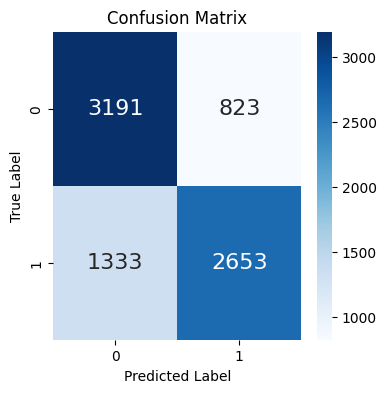

In [17]:
# Calculate confusion matrix
cm_NB = confusion_matrix(y_test, y_pred)

# Plot confusion matrix 
plt.figure(figsize=(4, 4))
sns.heatmap(cm_NB, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
cm_NB

array([[3191,  823],
       [1333, 2653]])

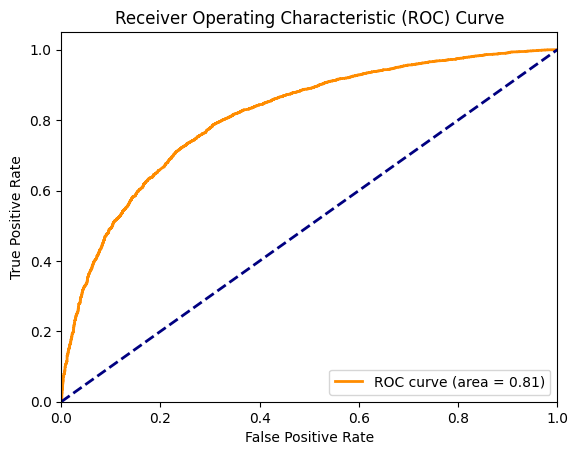

In [19]:
# Plot ROC curve
y_prob = NB_clf.predict_proba(X_test_counts)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# XGBOOST

In [20]:
# Training an XGBoost classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_counts, y_train)

# Predicting on the test set
y_pred_xgb = xgb_clf.predict(X_test_counts)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.732625

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      4014
           1       0.70      0.81      0.75      3986

    accuracy                           0.73      8000
   macro avg       0.74      0.73      0.73      8000
weighted avg       0.74      0.73      0.73      8000



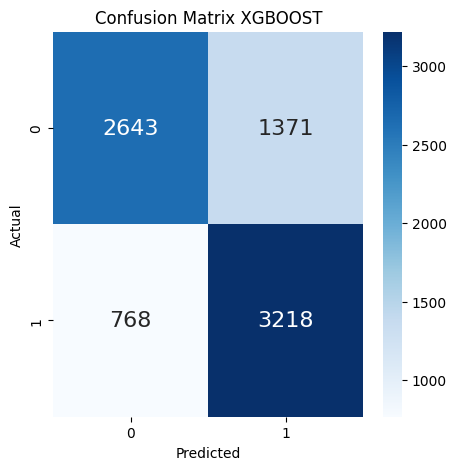

In [21]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix XGBOOST')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

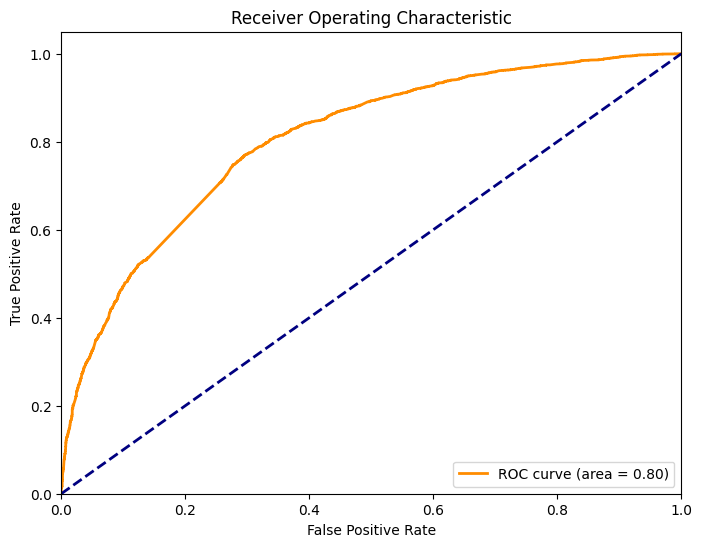

In [22]:
# Compute ROC curve
y_prob_xgb = xgb_clf.predict_proba(X_test_counts)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
# Perform k-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_clf, X_train_counts, y_train, cv=5)  

# Print the cross-validation scores
print("Cross-validation scores:")
for i, score in enumerate(cv_scores_xgb, start=1):
    print(f"Fold {i}: {score:.2f}")

Cross-validation scores:
Fold 1: 0.73
Fold 2: 0.72
Fold 3: 0.74
Fold 4: 0.73
Fold 5: 0.74


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression classifier 
logreg_clf = LogisticRegression(max_iter=1000)

# Training the classifier
logreg_clf.fit(X_train_counts, y_train)

# Predicting on the test set
y_pred_logreg = logreg_clf.predict(X_test_counts)

In [25]:
# Evaluating the classifier
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.74575

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      4014
           1       0.74      0.75      0.75      3986

    accuracy                           0.75      8000
   macro avg       0.75      0.75      0.75      8000
weighted avg       0.75      0.75      0.75      8000



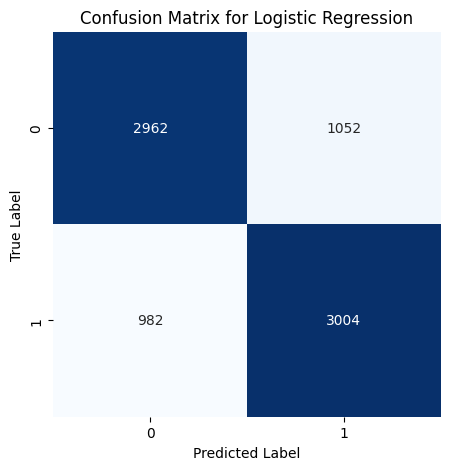

In [26]:
# Compute confusion matrix 
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix 
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=logreg_clf.classes_, yticklabels=logreg_clf.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

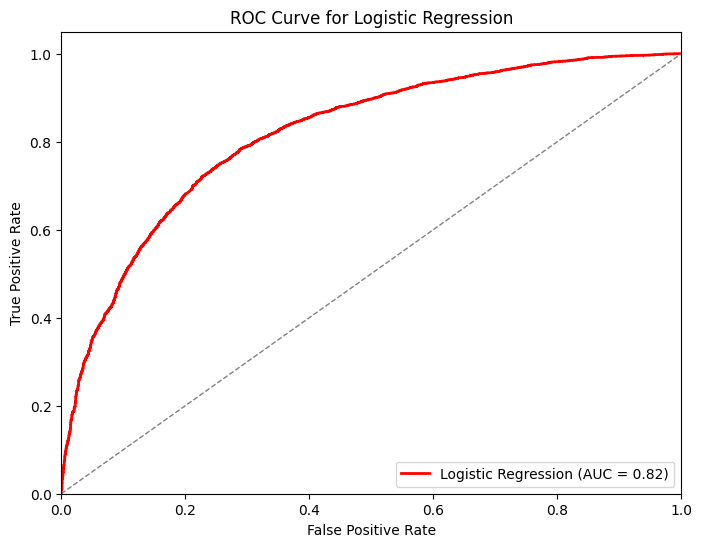

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve 
y_prob_logreg = logreg_clf.predict_proba(X_test_counts)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Plot ROC curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Perform k-fold cross-validation
cv_scores_logreg = cross_val_score(logreg_clf, X_train_counts, y_train, cv=5)

# Print the cross-validation scores
print("\nLogistic Regression Cross-validation scores:")
for i, score in enumerate(cv_scores_logreg, start=1):
    print(f"{i}: {score:.2f}")


Logistic Regression Cross-validation scores:
1: 0.74
2: 0.73
3: 0.75
4: 0.75
5: 0.75


# Random Forest

In [29]:
#  TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a pipeline 
pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('rf', rf_classifier)])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_RF = pipeline.predict(X_test)

# Calculate accuracy
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy_RF)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_RF))


Accuracy: 0.731
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      4014
           1       0.76      0.67      0.71      3986

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000



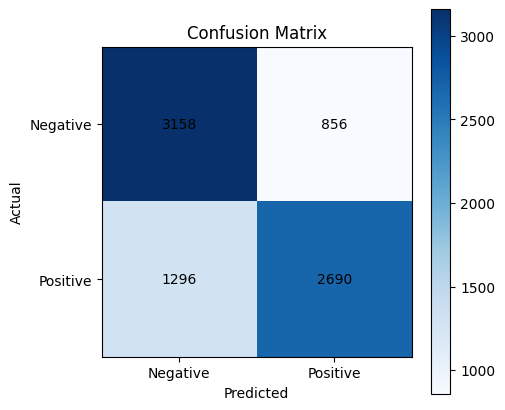

In [30]:
# Generate confusion matrix
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix_RF, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix_RF[i, j], ha='center', va='center', color='black')
plt.show()

In [31]:
conf_matrix_RF

array([[3158,  856],
       [1296, 2690]])

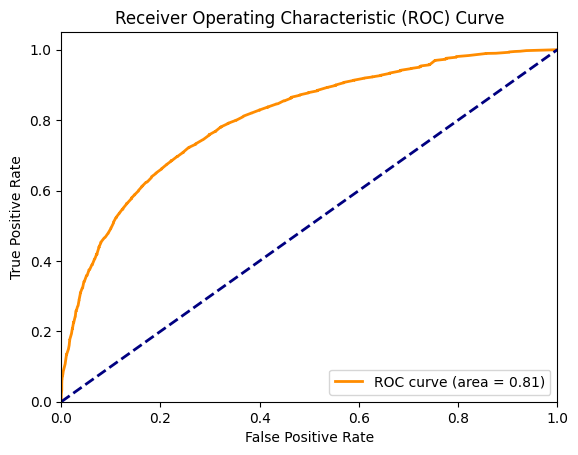

In [32]:
y_prob_RF = pipeline.predict_proba(X_test)

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_prob_RF[:, 1])
roc_auc_RF = auc(fpr_RF, tpr_RF)


plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Create a pipeline 
pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('rf', rf_classifier)])

# Perform k-fold cross-validation
cv_scores = cross_val_score(pipeline, df['text'], df['target'], cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.7395   0.724625 0.73725  0.725    0.741   ]


# ROC for all classifiers

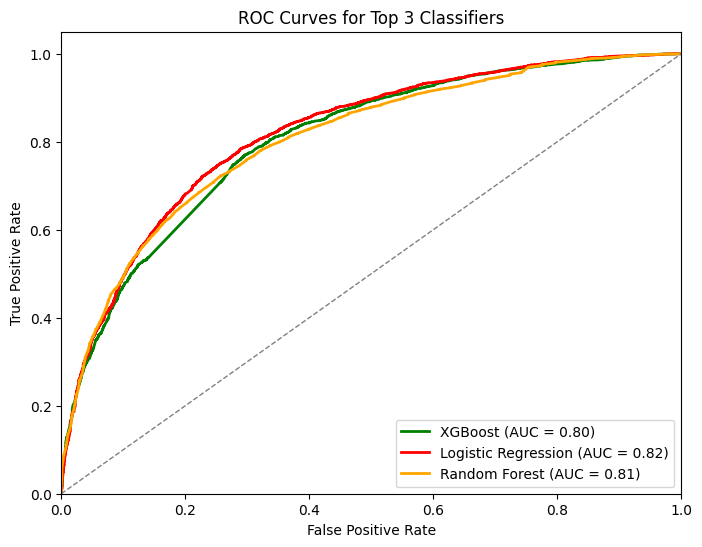

In [34]:
# Plot all ROC curves
plt.figure(figsize=(8, 6))

#plt.plot(fpr, tpr, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_RF, tpr_RF, color='orange', lw=2, label=f'Random Forest (AUC = {roc_auc_RF:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top 3 Classifiers')
plt.legend(loc='lower right')
plt.show()

# Summary

* After preparing the text using NLP libraries, the Twitter dataset is utilized to classify tweet sentiment into either positive or negative.
* To achieve accurate predictions, a variety of models - including Naive Bayes, XGBoost, Logistic Regression, and Random Forest - are utilized. 
* The performance of these models is evaluated using a range of metrics such as accuracy, F1 score, precision, and recall. 
* These metrics provide valuable insights into the effectiveness of each model. To provide a visual representation of the model predictions, confusion matrices are used. 
* In order to ensure the reliability of the results, k-fold cross-validation is employed. 
* The accuracies of the models fall within the range of 72% to 80%. 
* For more comprehensive analysis, all models are also compared using an ROC plot, which demonstrates their ability in distinguishing between positive and negative sentiments expressed in tweets.
